In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [3]:
N_POP = 200
N_GEN = 100

N_DIM = 100

MUT = 0.05
CROSS = 0.5

random_shift = 2*np.random.random((N_DIM))
print random_shift

[ 0.17259725  0.9901605   1.40479023  0.57168203  1.00582274  0.24535083
  0.93976305  1.82623926  0.86219471  0.34885689  1.5135245   0.57898759
  1.82691556  0.08030358  0.44759982  0.86060237  0.13561777  0.98102143
  1.15049745  0.67879887  0.25888049  1.91217147  1.51100746  1.36880012
  0.78759057  1.5161371   1.93893537  0.40213288  1.92542477  1.84358738
  0.64676934  1.38586965  1.42009488  0.67691884  1.62623833  0.85531735
  0.24089423  1.75327869  0.3103015   1.68050432  0.5993795   0.61156094
  0.89756934  1.61891842  0.5743545   1.18276564  1.76870254  1.0035871
  1.8776051   1.71511012  1.83084204  1.38238879  1.56761245  1.36510378
  1.82871737  0.330186    0.93852888  0.73202608  1.02028402  1.47401279
  0.8443909   0.83988541  0.52744024  0.74029076  1.36194203  0.17929241
  0.11077466  0.18083429  0.31961592  1.1548268   1.63289128  0.1240315
  1.29022613  0.30476033  1.78438847  1.24487197  0.54041516  0.47536482
  1.38404301  0.30427517  0.03787978  1.96529149  0.6

In [11]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=20):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return (pt, loss(pt))

pop = [generate_random_point() for ix in range(N_POP)]
temp = []

def crossover(p1, p2):
    n_dim = p1.shape[0]
    
    c1 = np.zeros(p1.shape)
    c2 = np.zeros(p2.shape)
    
    split = int(n_dim * CROSS)
    
    if split == 0:
        c1 = p1
        c2 = p2
    else:
        c1[:split] = p1[:split]
        c1[split:] = p2[split:]
        
        c2[:split] = p2[:split]
        c2[split:] = p1[split:]
    return c1, c2

def mutate(x):
    n_dim = x.shape[0]
    X = np.zeros(x.shape)
    
    for ix in range(n_dim):
        r = np.random.random()
        if r < MUT:
            # mutate
            X[ix] = x[ix] + (2*np.random.random() - 1)
        else:
            X[ix] = x[ix]
    return X

In [12]:
losses = []

In [13]:
for gen in range(N_GEN):
    # sort the population
    ord_pop = sorted(pop, key=lambda x: x[1])
    best = ord_pop[0]
    print best[1]#, best[0]
    losses.append(best[1])
    
    # create temp population
    temp = []
    
    while len(temp) < N_POP:
        # select p1 and p2 (parents)
        p1, p2 = random.sample(ord_pop[:N_POP/2], 2)
        
        # apply crossover to generate c1 and c2 (children)
        c1, c2 = crossover(p1[0], p2[0])        
        
        # apply mutation on c1 and c2
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        t = [p1, p2, (c1, loss(c1)), (c2, loss(c2))]
        t_sorted = sorted(t, key=lambda x: x[1])
        # save the best of p1, p2, c1, c2 in temp
        
        temp += t_sorted[:2]
        
    # replace population with temp
    pop = temp

10206.1086401
9603.45220086
8678.15128946
8678.15128946
8567.72498656
8542.18123775
8542.18123775
8516.15818111
8475.15816463
8469.51698022
8417.72268457
8387.57313933
8359.90374128
8292.24443864
8274.15255871
8186.86649542
8186.86649542
8168.87191856
8128.20390119
8051.12793354
8034.2891202
8000.97271926
7945.90376031
7879.04429241
7879.04429241
7844.51221639
7799.77309011
7755.92125273
7719.80625375
7679.57511454
7628.48044163
7592.02691998
7564.89682243
7515.934457
7492.3715109
7438.86869721
7402.14365338
7380.52770567
7356.81952881
7343.87112095
7274.56335408
7208.38176811
7184.69723436
7125.56148313
7125.56148313
7076.07726126
7042.14438862
6991.21024921
6978.90729107
6918.21075928
6899.58129648
6861.65734238
6838.4092258
6819.1581356
6779.86278782
6722.61743596
6706.45863199
6674.08117788
6654.96547826
6619.43301668
6582.14739487
6567.37313239
6516.6835255
6468.64429737
6450.94432607
6400.79445579
6354.30138201
6291.63195496
6287.85614528
6228.68772847
6201.73331958
6138.72397617

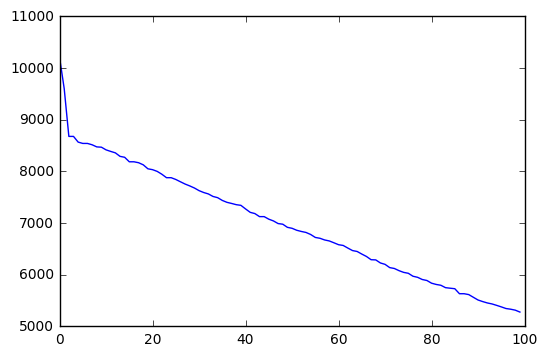

In [14]:
plt.plot(losses)